In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [24]:
sub = 'dhruvaTest'

movement_data = pd.read_csv('../data/data_movements_' + str(sub) + '.csv')

In [25]:
#movement_data.loc[movement_data.state == "reach"]

<Axes: xlabel='x', ylabel='y'>

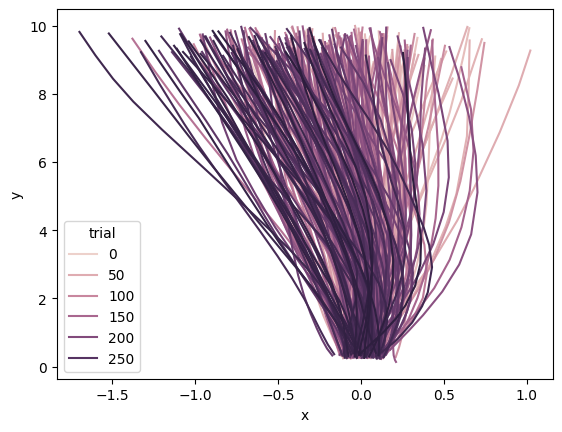

In [26]:
sns.lineplot(data = movement_data.loc[movement_data.state.isin(['reach'])], x = "x", y = "y", hue = "trial", sort = False)

In [27]:
#sns.lineplot(data = movement_data, x = "x", y = "y", hue = "trial", sort = False)

In [28]:
movement_data.head(200)

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_ring,0,0.007070,-9.707496,-3.446202
1,1,0,search_ring,1,0.014975,-9.707471,-3.446222
2,2,0,search_ring,2,0.024915,-9.707470,-3.446234
3,3,0,search_ring,3,0.039909,-9.707470,-3.446238
4,4,0,search_ring,4,0.057897,-9.707488,-3.446237
...,...,...,...,...,...,...,...
195,195,0,search_ring,195,3.239886,-9.707464,-3.446369
196,196,0,search_ring,196,3.256903,-9.707473,-3.446372
197,197,0,search_ring,197,3.274909,-9.707468,-3.446351
198,198,0,search_ring,198,3.290923,-9.707470,-3.446355


In [29]:
#Checking that there are 300 reach trials: conclusion = yes
movement_data.loc[(movement_data.trial == 299) & (movement_data.state == 'reach')]

,Unnamed: 0,trial,state,sample,time,x,y
73171,136,299,reach,73470,1224.568700,-0.012690,0.351744
73172,137,299,reach,73471,1224.585281,-0.001206,0.631090
73173,138,299,reach,73472,1224.602298,0.017394,0.993934
73174,139,299,reach,73473,1224.619288,0.036796,1.442288
73175,140,299,reach,73474,1224.636258,0.048798,2.113173
73176,141,299,reach,73475,1224.653276,0.040018,2.728015
73177,142,299,reach,73476,1224.669273,0.021272,3.232022
73178,143,299,reach,73477,1224.685372,-0.018574,3.958417
73179,144,299,reach,73478,1224.702269,-0.071404,4.739552
73180,145,299,reach,73479,1224.719313,-0.134032,5.560312


In [30]:
# convert x, y coordinates for 'reach' to polar and add these to the data as columns 
# function inspired from https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates 
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)

# create new subset of movement data only including reach state 
reach_data = movement_data.loc[movement_data.state == 'reach'].copy()

reach_x = reach_data.loc[(reach_data.state == 'reach'), 'x'].values
reach_y  = reach_data.loc[(reach_data.state == 'reach'), 'y'].values

r, theta = cart2pol(reach_x, reach_y)

In [31]:
# add r and theta to the reach dataset as columns 
reach_data['r'] = r
reach_data['theta'] = theta

In [32]:
reach_data

,Unnamed: 0,trial,state,sample,time,x,y,r,theta
3648,3648,0,reach,3648,60.824474,-0.086661,0.265678,0.279455,1.886101
3649,3649,0,reach,3649,60.841023,-0.111053,0.609793,0.619823,1.750938
3650,3650,0,reach,3650,60.857048,-0.117507,1.103314,1.109554,1.676900
3651,3651,0,reach,3651,60.875036,-0.109616,1.752432,1.755857,1.633266
3652,3652,0,reach,3652,60.891068,-0.102027,2.562341,2.564371,1.610593
...,...,...,...,...,...,...,...,...,...
73181,146,299,reach,73480,1224.737273,-0.221416,6.615601,6.619305,1.604253
73182,147,299,reach,73481,1224.752268,-0.272322,7.251222,7.256333,1.608334
73183,148,299,reach,73482,1224.769296,-0.331096,8.089543,8.096316,1.611702
73184,149,299,reach,73483,1224.785279,-0.380595,8.911267,8.919391,1.613480
